# Data imbalances

When our data labels have more of one category than another, we say that we have a data imbalance. For example, recall that in our scenario, we're trying to identify objects found by drone sensors. Our data is imbalanced because there are vastly different numbers of hikers, animals, trees, and rocks in our training data. We can see this either by tabulating this data:

| Label | Hiker | Animal | Tree | Rock |
| ----- | ----- | ------ | ---- | ---- |
| Count | 400   | 200    | 800  | 800  |

Or plotting it:


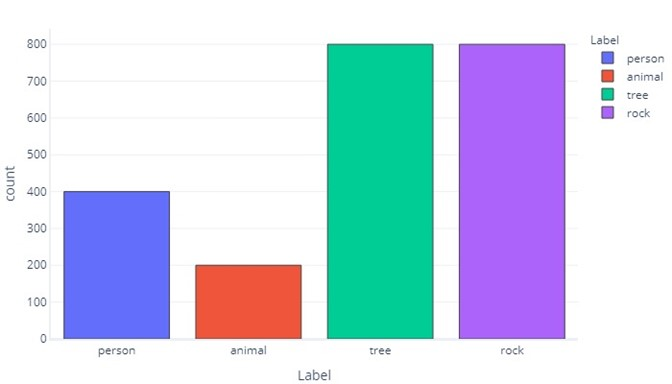


Note how most of the data are trees or rocks. A balanced dataset doesn't have this problem.

For example, if we were trying to predict whether an object is a hiker, animal, tree, or rock, we'd ideally want an equal number of all categories, like so:

| Label | Hiker | Animal | Tree | Rock |
| ----- | ----- | ------ | ---- | ---- |
| Count | 550   | 550    | 550  | 550  |

If we were simply trying to predict whether an object was a hiker, we'd ideally want an equal number of hiker and not-hiker objects:

| Label | Hiker | Non-Hiker |
| ----- | ----- | --------- |
| Count | 1100  | 1100      |


## Why do data imbalances matter?
Data imbalances matter because models can learn to mimic these imbalances when it isn't desirable. For example, pretend we trained a logistic regression model to identify objects as hiker or not-hiker. If the training data was heavily dominated by "hiker" labels, then training would bias the model to almost always return "hiker" labels. In the real world, though, we might find that most things the drones come across are trees. The biased model would probably label many of these trees as hikers.

This phenomenon takes place because cost functions, by default, determine if the correct response was given. This means that for a biased dataset, the simplest way for a model to reach optimum performance can be to virtually ignore the features provided and always, or almost always, return the same answer. This can have devastating consequences. For example, imagine that our hiker/not-hiker model is trained on data where only one per 1000 samples contain a hiker. A model that has learned to return "not-hiker" every single time has an accuracy of 99.9%! This statistic appears to be outstanding, but the model is useless because it will never tell us if someone is on the mountain, and we won't know to rescue them if an avalanche hits.

### Bias in a confusion matrix
Confusion matrices are the key to identifying data imbalances or model bias. In an ideal scenario, the test data have an approximately even number of labels, and the predictions made by the model also are approximately spread across the labels. For 1000 samples, a model that is unbiased, but often gets answers wrong, might look something like so:

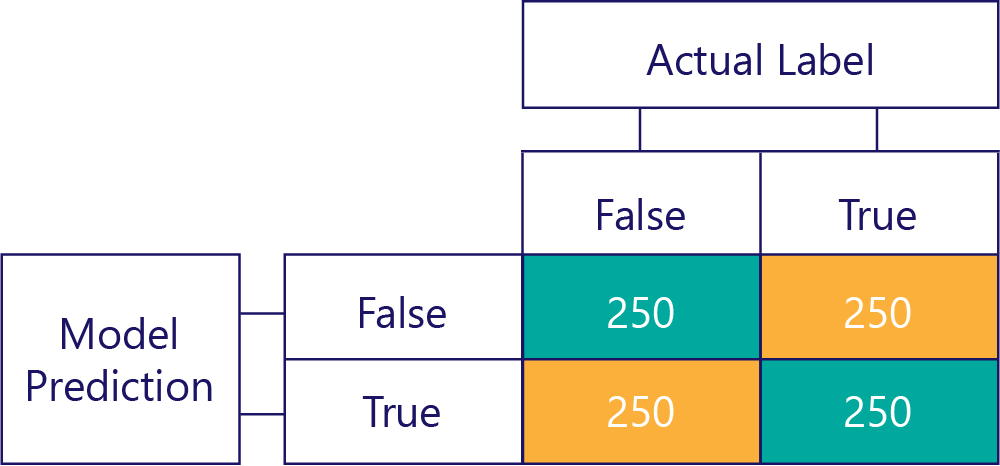

We can tell that the input data is unbiased, because the row sums are the same (500 each), indicating that half the labels are "true", and half are "false". Similarly, we can see that the model is giving unbiased responses because it is returning true half the time and false the other half of the time.

By contrast, biased data mostly contains one kind of label, like so:

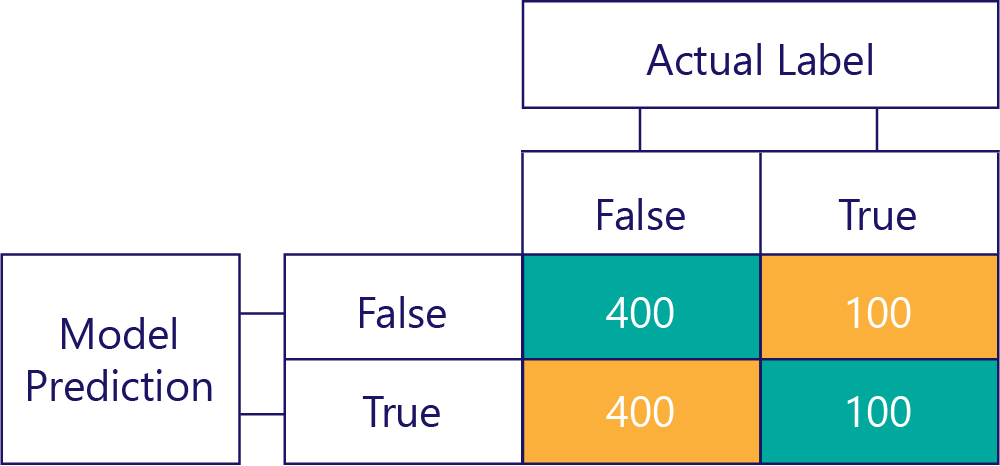

Similarly, a biased model mostly produces one kind of label, like so:

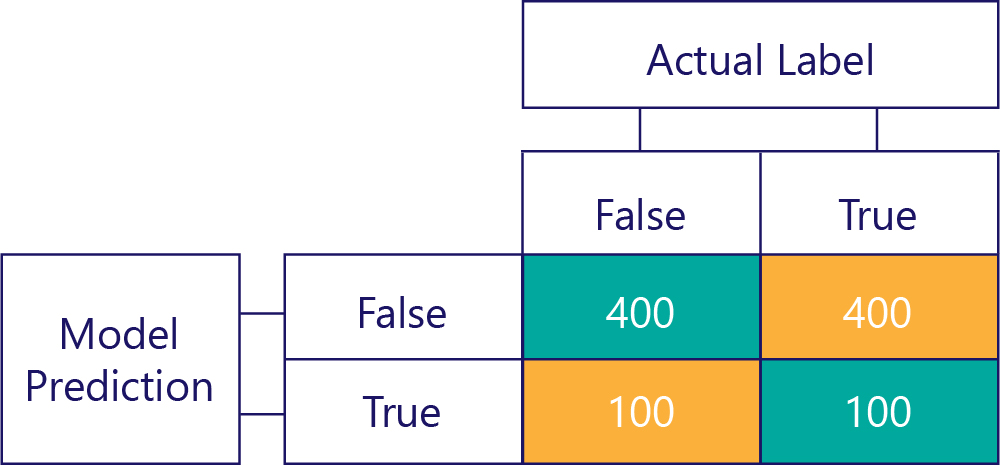

### Model bias isn't accuracy
Remember that bias isn't accuracy. For example, some of the preceding examples are biased, and others aren't, but they all show a model that gets the answer correct 50% of the time. As a more extreme example, the matrix below shows an unbiased model that is inaccurate:



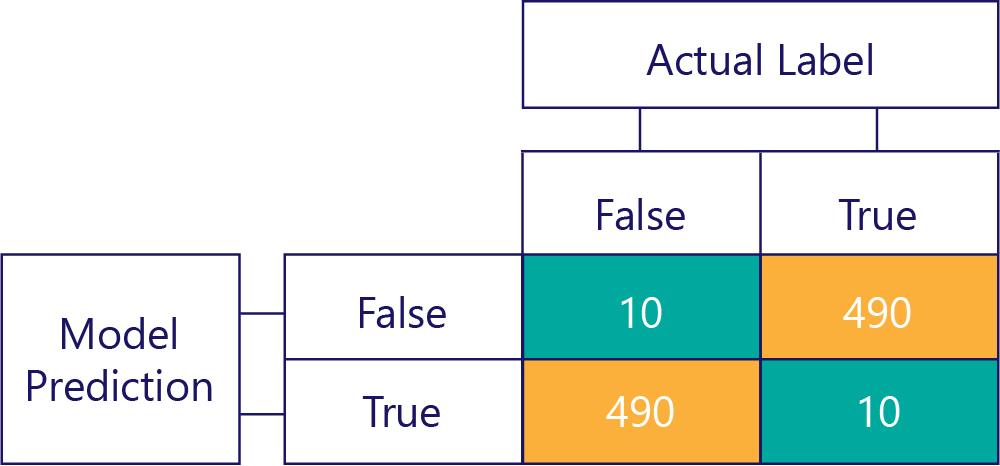

Notice how the number of rows and columns all add to 500, indicating both data are balanced and the model isn't biased. This model is getting almost all responses incorrect, though!

Of course, **our goal is to have models are accurate and unbiased**, such as:

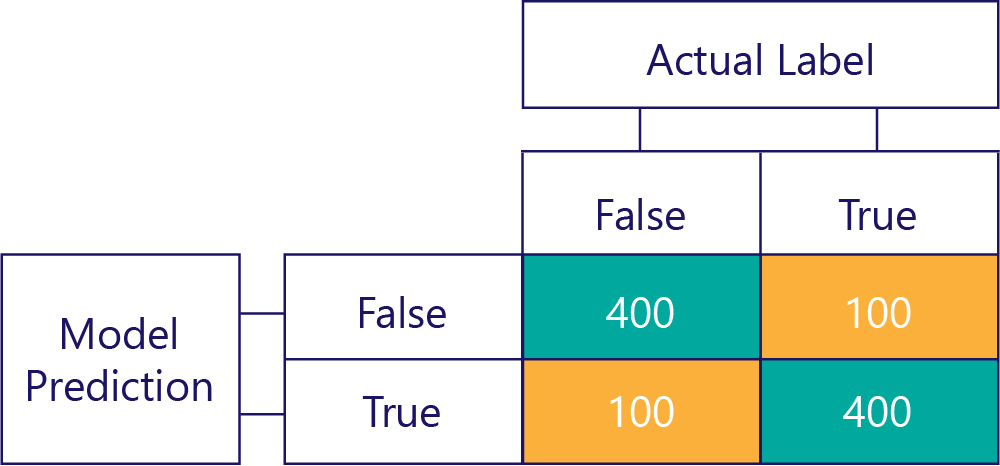

…but we need to ensure our accurate models aren't biased, simply because the data are:

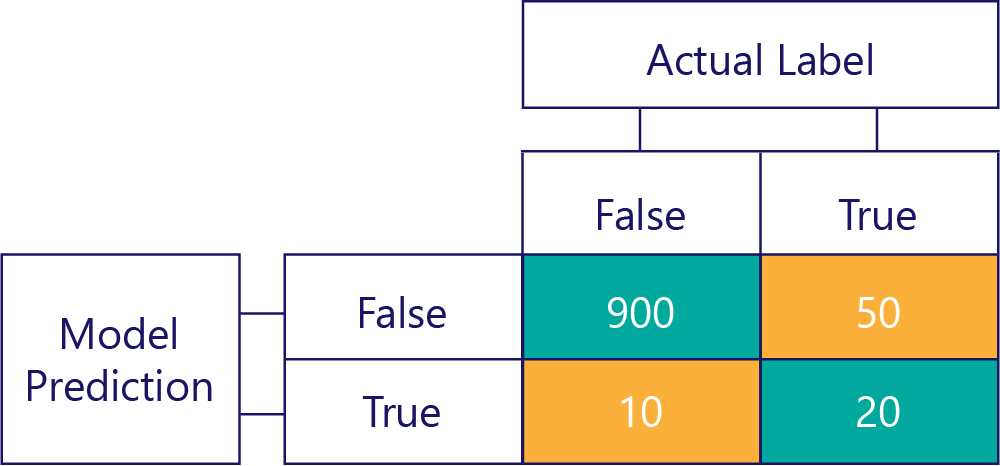

In this example, notice how the actual labels are mostly false (left column, **showing a data imbalance**) and the model also frequently returns false (top row, **showing model bias**). This model isn't good at correctly giving ‘True’ responses.

## Avoiding the consequences of imbalanced data
Some of the simplest ways to avoid the consequences of imbalanced data are:

Avoid it through better data selection.
"Resample" your data so that it contains duplicates of the minority label class.
Make changes to the cost function so that it prioritizes less-common labels. For example, if the wrong response is given to Tree, the cost function might return 1; while if the wrong response is made to Hiker, it might return 10.
We'll explore these methods in the following exercise.

